In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read the data

df = pd.read_csv(r"C:\Users\myhie\Downloads\movies.csv")

In [3]:
#Check the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
rows, columns = df.shape
rows

7668

In [5]:
# Check for missing data

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))
   

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
# Cleaning the missing values in gross and convert its data type

df1 = df.dropna(subset=['gross'])
df1['gross'] = df1['gross'].astype('int64')
df1.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344,Orion Pictures,98.0


In [7]:
df2 = df1['released'].str.split('(', n = 1, expand = True)
df1['new_released_date'] = df2[0]
df1['new_released_place'] = df2[1]
df1.drop(columns =['released'], inplace = True)
df1.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,new_released_date,new_released_place
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772,Warner Bros.,146.0,"June 13, 1980",United States)
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106,Columbia Pictures,104.0,"July 2, 1980",United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067,Lucasfilm,124.0,"June 20, 1980",United States)
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539,Paramount Pictures,88.0,"July 2, 1980",United States)
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344,Orion Pictures,98.0,"July 25, 1980",United States)


In [8]:
# Year of release and release date should match, but still some are not 

# Create new year column from released column
df1['correct year'] = df1['new_released_date'].astype(str).str[-5:]
df1.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,new_released_date,new_released_place,correct year
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772,Warner Bros.,146.0,"June 13, 1980",United States),1980
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106,Columbia Pictures,104.0,"July 2, 1980",United States),1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067,Lucasfilm,124.0,"June 20, 1980",United States),1980
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539,Paramount Pictures,88.0,"July 2, 1980",United States),1980
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344,Orion Pictures,98.0,"July 25, 1980",United States),1980


In [87]:
# Finding the movies with highest gross

df1 = df1.sort_values(by=['gross'], inplace = False, ascending = False)

In [88]:
# Show all the rows in the table, can roll up and down

pd.set_option('display.max_rows', None)


In [9]:
# Check and drop for duplicate

#df1['company'].sort_values(ascending = False) # check duplications in company columns

df1 = df1.drop_duplicates()
df1.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,new_released_date,new_released_place,correct year
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772,Warner Bros.,146.0,"June 13, 1980",United States),1980
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106,Columbia Pictures,104.0,"July 2, 1980",United States),1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067,Lucasfilm,124.0,"June 20, 1980",United States),1980
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539,Paramount Pictures,88.0,"July 2, 1980",United States),1980
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344,Orion Pictures,98.0,"July 25, 1980",United States),1980


In [ ]:
# Test which factors have high correlation with gross

# Rating, budget, company, star, genre, score

In [10]:
df1.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,new_released_date,new_released_place,correct year
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772,Warner Bros.,146.0,"June 13, 1980",United States),1980
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106,Columbia Pictures,104.0,"July 2, 1980",United States),1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067,Lucasfilm,124.0,"June 20, 1980",United States),1980
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539,Paramount Pictures,88.0,"July 2, 1980",United States),1980
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344,Orion Pictures,98.0,"July 25, 1980",United States),1980


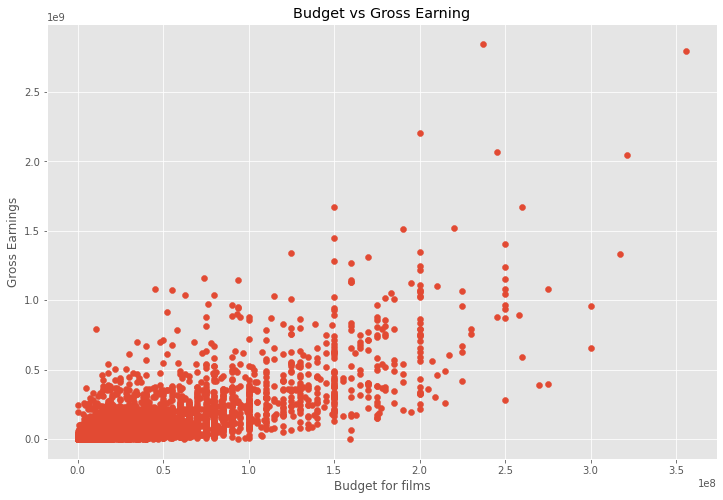

In [91]:
# Building scatter plot to compare the correlations

plt.scatter(x = df1['budget'], y = df1['gross'])

plt.title('Budget vs Gross Earning')

plt.xlabel('Budget for films')

plt.ylabel('Gross Earnings')

plt.show()

Text(0.5, 1.0, 'Budget vs Gross Earning')

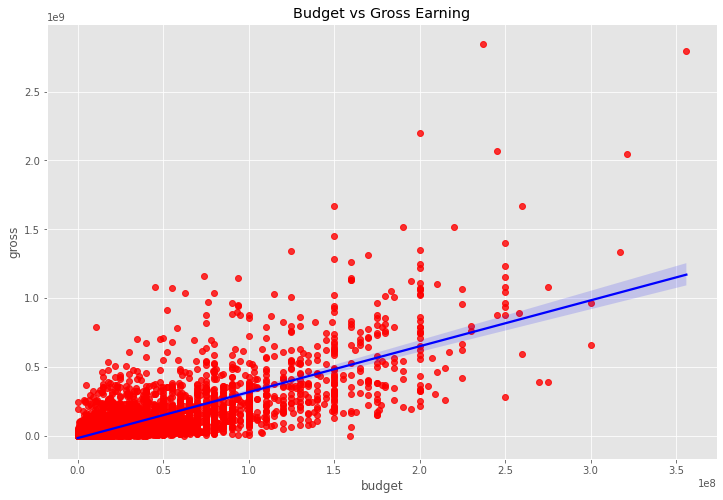

In [92]:
# Using seaborn for correlation between budget and gross

import seaborn as sns
sns.regplot(x='budget', y='gross', data=df1, scatter_kws = {"color": "red"},
            line_kws = {"color": "blue"})
plt.title('Budget vs Gross Earning')

In [93]:
# Examine the correlation

# Corr type: pearson, kendall, spearman

df1.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.091821,0.215740,0.327781,0.257486,0.114706
score,0.091821,1.000000,0.413096,0.071792,0.186258,0.397321
votes,0.215740,0.413096,1.000000,0.440021,0.630757,0.309536
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.114706,0.397321,0.309536,0.318595,0.245216,1.000000


In [ ]:
# High correlation between budget and gross, votes and gross

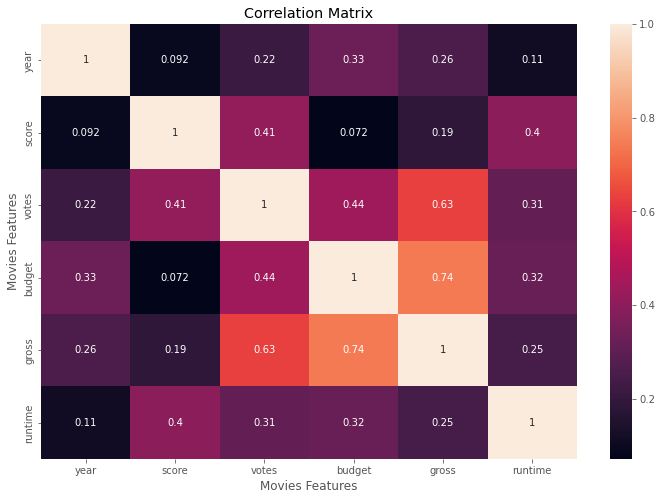

In [94]:
correlation_matrix = df1.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix')

plt.xlabel('Movies Features')

plt.ylabel('Movies Features')

plt.show()

In [11]:
# Examine company and gross earning relationship

# Change the data type to category type so that can compare

df_numerized = df1

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] =  df_numerized[col_name].cat.codes
            
df_numerized.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,new_released_date,new_released_place,correct year
0,6428,6,6,1980,8.4,927000.0,2500,3890,994,52,19000000.0,46998772,2213,146.0,1483,54,0
1,5426,6,1,1980,5.8,65000.0,2189,1578,313,53,4500000.0,58853106,701,104.0,1287,54,0
2,5006,4,0,1980,8.7,1200000.0,1072,2485,1666,53,18000000.0,538375067,1470,124.0,1540,54,0
3,280,4,4,1980,7.7,221000.0,1260,1936,2146,53,3500000.0,83453539,1728,88.0,1287,54,0
4,1001,6,4,1980,7.3,108000.0,1019,507,394,53,6000000.0,39846344,1695,98.0,1335,54,0


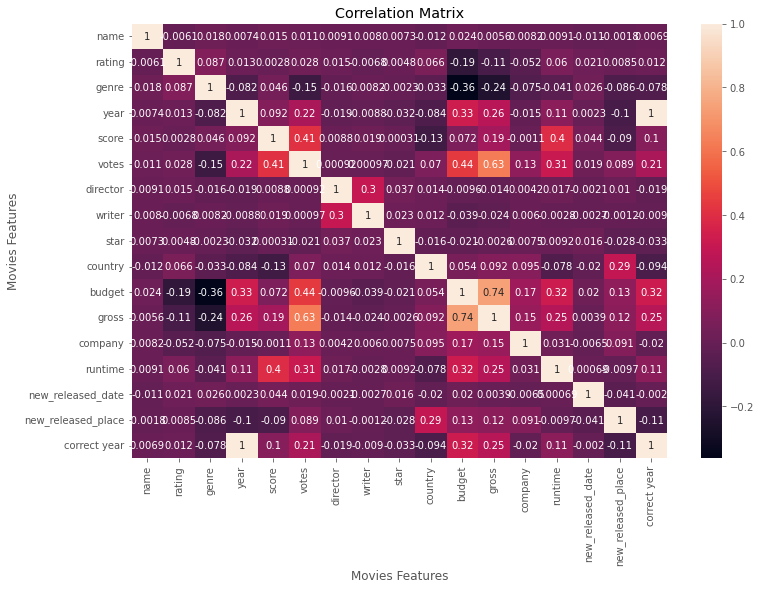

In [96]:
# Compare correlations of all factors with gross earnings

correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix')

plt.xlabel('Movies Features')

plt.ylabel('Movies Features')

plt.show()

In [97]:
df_numerized.corr()


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,new_released_date,new_released_place,correct year
name,1.000000,-0.006091,0.017885,0.007404,0.015473,0.011429,0.009092,0.008008,0.007278,-0.012027,0.023630,0.005557,0.008155,0.009142,-0.010953,-0.001774,0.006891
rating,-0.006091,1.000000,0.087325,0.012776,0.002766,0.028082,0.014723,-0.006793,0.004774,0.066465,-0.187347,-0.107339,-0.052477,0.059870,0.021069,0.008509,0.011569
genre,0.017885,0.087325,1.000000,-0.082252,0.046093,-0.149289,-0.016412,0.008231,-0.002322,-0.033283,-0.363257,-0.243059,-0.074570,-0.041023,0.025941,-0.086243,-0.077869
year,0.007404,0.012776,-0.082252,1.000000,0.091821,0.215740,-0.019116,-0.008780,-0.032319,-0.084488,0.327781,0.257486,-0.014883,0.114706,0.002290,-0.102352,0.997499
score,0.015473,0.002766,0.046093,0.091821,1.000000,0.413096,0.008810,0.018648,0.000310,-0.129474,0.071792,0.186258,-0.001107,0.397321,0.044384,-0.090318,0.099560
votes,0.011429,0.028082,-0.149289,0.215740,0.413096,1.000000,0.000919,0.000972,-0.021274,0.069934,0.440021,0.630757,0.131020,0.309536,0.019073,0.089287,0.211400
director,0.009092,0.014723,-0.016412,-0.019116,0.008810,0.000919,1.000000,0.297601,0.036794,0.014435,-0.009593,-0.014490,0.004213,0.016942,-0.002116,0.010408,-0.018896
writer,0.008008,-0.006793,0.008231,-0.008780,0.018648,0.000972,0.297601,1.000000,0.023374,0.011871,-0.039188,-0.023574,0.005972,-0.002816,-0.002726,-0.001185,-0.008979
star,0.007278,0.004774,-0.002322,-0.032319,0.000310,-0.021274,0.036794,0.023374,1.000000,-0.016192,-0.020515,-0.002602,0.007518,0.009227,0.015637,-0.028371,-0.033085
country,-0.012027,0.066465,-0.033283,-0.084488,-0.129474,0.069934,0.014435,0.011871,-0.016192,1.000000,0.054354,0.091920,0.095016,-0.078174,-0.019699,0.288653,-0.094279


In [99]:
correlation_matrix = df_numerized.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs

name                name                  1.000000
                    rating               -0.006091
                    genre                 0.017885
                    year                  0.007404
                    score                 0.015473
                    votes                 0.011429
                    director              0.009092
                    writer                0.008008
                    star                  0.007278
                    country              -0.012027
                    budget                0.023630
                    gross                 0.005557
                    company               0.008155
                    runtime               0.009142
                    new_released_date    -0.010953
                    new_released_place   -0.001774
                    correct year          0.006891
rating              name                 -0.006091
                    rating                1.000000
                    genre      

In [100]:
# Sorted correlation in pairs

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre               budget               -0.363257
budget              genre                -0.363257
gross               genre                -0.243059
genre               gross                -0.243059
budget              rating               -0.187347
rating              budget               -0.187347
genre               votes                -0.149289
votes               genre                -0.149289
country             score                -0.129474
score               country              -0.129474
gross               rating               -0.107339
rating              gross                -0.107339
new_released_place  correct year         -0.105128
correct year        new_released_place   -0.105128
new_released_place  year                 -0.102352
year                new_released_place   -0.102352
correct year        country              -0.094279
country             correct year         -0.094279
score               new_released_place   -0.090318
new_released_place  score      

In [101]:
# Sorting for pairs that have correlations over 0.5

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr 

gross               votes                 0.630757
votes               gross                 0.630757
gross               budget                0.740395
budget              gross                 0.740395
year                correct year          0.997499
correct year        year                  0.997499
name                name                  1.000000
star                star                  1.000000
new_released_date   new_released_date     1.000000
runtime             runtime               1.000000
company             company               1.000000
gross               gross                 1.000000
budget              budget                1.000000
country             country               1.000000
writer              writer                1.000000
director            director              1.000000
votes               votes                 1.000000
score               score                 1.000000
year                year                  1.000000
genre               genre      

In [ ]:
# Note: Votes and budget have the highest correlations to gross earnings